In [55]:
import pickle

with open("subroutine_info.pkl", "rb") as f:
    subroutine_info = pickle.load(f)

In [82]:
len(subroutine_info) - len(func_df)

25020

In [63]:
subroutine_info["dmaengine_pause"]

defaultdict(depsurf.dwarf.traverser.SubroutineEntry,
            {'include/linux/dmaengine.h': SubroutineEntry(external=False, caller_inline=['serial8250_rx_dma_flush', 'pl011_int'], caller_func=[])})

In [69]:
for k in set(subroutine_info.keys()) - set(func_df["name"]):
    for location, info in subroutine_info[k].items():
        if info.external:
            print(location, info.external)
        # assert not info.external, info
        # print(location, info.external)

__builtin_strncmp True
fdt_begin_node True
get_fdt True
efi_setup_gop True
efi_get_random_bytes True
__real_memchr_inv True
get_dram_base True
efi_random_get_seed True
efi_convert_cmdline True
efi_parse_options True
efi_get_secureboot True
fdt_create True
handle_kernel_image True
efi_get_virtmap True
__builtin_memcmp True
efi_free True
check_platform_features True
efi_random_alloc True
is_quiet True
novamap True
efi_low_alloc_above True
__builtin_strchr True
efi_retrieve_tpm2_eventlog True
get_efi_config_table True
__real_strnlen True
__builtin_memset True
efi_relocate_kernel True
efi_high_alloc True
__builtin_memcpy True
nokaslr True
__builtin_strncpy True
__builtin_strcmp True
efi_exit_boot_services True
__builtin_strcpy True
fdt_resize True
fdt_finish True
install_memreserve_table True
fdt_property True
fdt_finish_reservemap True
fdt_property_placeholder True
efi_entry True
efi_get_memory_map True
fdt_create_empty_tree True
__real_strlcpy True
efi_printk True
handle_cmdline_files Tr

In [1]:
from depsurf import get_symbol_info_impl


df = get_symbol_info_impl("vmlinux-5.4.0-26-generic")

In [42]:
df[-20:]

,name,section,bind,type,visibility,value,size
165991,aead_register_instance,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336495644184,136
165992,dm_stats_init,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336501221832,188
165993,desc_to_gpio,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336496698896,60
165994,print_type_format_s32,.rodata,STB_GLOBAL,STT_OBJECT,STV_DEFAULT,18446603336504192496,3
165995,nd_btt_version,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336499466984,256
165996,alloc_file_clone,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336493324904,100
165997,devm_of_phy_get,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336496474280,148
165998,audit_panic,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336491635592,112
165999,devm_hwmon_device_unregister,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336500974216,84
166000,rb_next,.text,STB_GLOBAL,STT_FUNC,STV_DEFAULT,18446603336503851416,80


In [91]:
func_df = df[df.type == "STT_FUNC"]

len(func_df)

53628

In [150]:
duplicated_func_df = func_df[func_df.duplicated("name", keep=False)]

In [148]:
# find duplucate names in func_df

len(func_df[func_df.duplicated("name", keep=False)])

2315

In [92]:
local_func_df = func_df[func_df["bind"] == "STB_LOCAL"]

len(local_func_df)

31381

In [49]:
renamed_df = func_df[func_df.name.str.contains(".", regex=False)]

assert (renamed_df.bind == "STB_LOCAL").all()

renamed_df

,name,section,bind,type,visibility,value,size
75,arm64_skip_faulting_instruction.part.0,.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336490237664,32
80,arm64_compat_skip_faulting_instruction.constprop.0,.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336490238096,168
83,bitmap_zero.constprop.0,.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336490238448,8
127,is_el1_permission_fault.isra.0,.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336490340000,156
131,do_bad_area.part.0,.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336490340464,96
159,armctrl_of_init.isra.0,.init.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336511064092,472
220,sun4i_of_init.isra.0,.init.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336511065776,452
265,arm64_kernel_use_ng_mappings.part.0,.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336496368872,128
270,gic_get_cpumask.isra.0,.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336496365240,136
349,arm64_kernel_use_ng_mappings.part.0,.text,STB_LOCAL,STT_FUNC,STV_DEFAULT,18446603336496379908,128


In [103]:
suffix_df = renamed_df.name.map(
    lambda x: x.split(".", 1)[-1].replace(".0", "")
).value_counts()

suffix_df = suffix_df.reset_index()
suffix_df.columns = ["suffix", "count"]
suffix_df["renamed %"] = suffix_df["count"] / len(renamed_df) * 100
suffix_df["total %"] = suffix_df["count"] / len(local_func_df) * 100


print(suffix_df.sum(numeric_only=True))

suffix_df

count        2246.000000
renamed %     100.000000
total %         7.157197
dtype: float64


,suffix,count,renamed %,total %
0,isra,992,44.167409,3.161148
1,part,815,36.286732,2.597113
2,constprop,325,14.470169,1.035659
3,isra.part,76,3.383793,0.242185
4,isra.constprop,32,1.424755,0.101973
5,part.constprop,5,0.222618,0.015933
6,isra.part.constprop,1,0.044524,0.003187


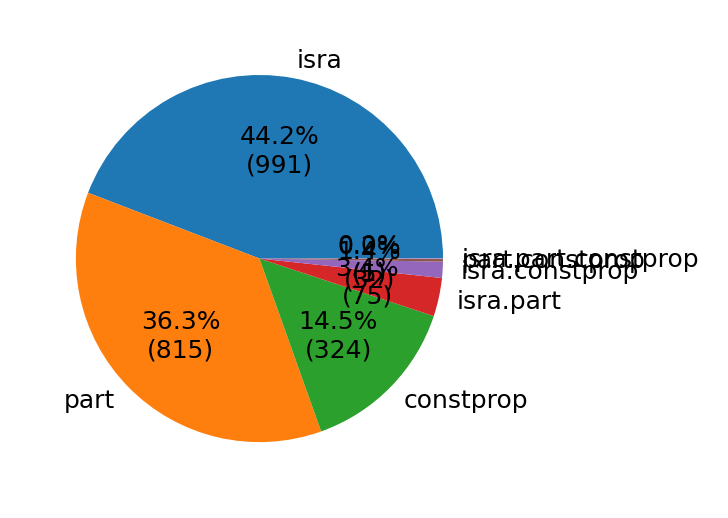

In [143]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)

total = suffix_df["count"].sum()

ax.pie(
    suffix_df["count"],
    labels=suffix_df["suffix"],
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct * total / 100)})",
    textprops={'fontsize': 6}
)


plt.tight_layout()

In [28]:
df.type.unique()

array(['STT_NOTYPE', 'STT_SECTION', 'STT_FILE', 'STT_FUNC', 'STT_OBJECT'],
      dtype=object)

In [41]:
df[(df.type == "STT_OBJECT")][:5]

,name,section,bind,type,visibility,value,size
85,__UNIQUE_ID_ddebug22.44460,.data,STB_LOCAL,STT_OBJECT,STV_DEFAULT,18446603336519985128,56
97,__func__.44502,.rodata,STB_LOCAL,STT_OBJECT,STV_DEFAULT,18446603336504059160,18
98,esr_class_str,.rodata,STB_LOCAL,STT_OBJECT,STV_DEFAULT,18446603336504059184,512
99,__func__.44461,.rodata,STB_LOCAL,STT_OBJECT,STV_DEFAULT,18446603336504059696,15
100,cp15_32_hooks,.rodata,STB_LOCAL,STT_OBJECT,STV_DEFAULT,18446603336504059712,32


In [39]:
df[(df.type == "STT_OBJECT") & (df.name.str.startswith("__tracepoint"))][:5]

,name,section,bind,type,visibility,value,size
140611,__tracepoint_block_bio_backmerge,.data,STB_GLOBAL,STT_OBJECT,STV_DEFAULT,18446603336519972224,48
140619,__tracepoint_hrtimer_expire_entry,.data,STB_GLOBAL,STT_OBJECT,STV_DEFAULT,18446603336519956720,48
140645,__tracepoint_page_pool_state_release,.data,STB_GLOBAL,STT_OBJECT,STV_DEFAULT,18446603336519982544,48
140648,__tracepoint_dax_pmd_load_hole_fallback,.data,STB_GLOBAL,STT_OBJECT,STV_DEFAULT,18446603336519965504,48
140656,__tracepoint_dev_pm_qos_update_request,.data,STB_GLOBAL,STT_OBJECT,STV_DEFAULT,18446603336519957968,48


In [40]:
df[(df.type == "STT_NOTYPE") & (df.bind == "STB_GLOBAL")][:5]

,name,section,bind,type,visibility,value,size
140684,tramp_pg_dir,.init.text,STB_GLOBAL,STT_NOTYPE,STV_DEFAULT,18446603336510767104,0
140706,kallsyms_token_table,.rodata,STB_GLOBAL,STT_NOTYPE,STV_DEFAULT,18446603336508311456,0
140744,__stop___kcrctab_gpl_future,__ksymtab_strings,STB_GLOBAL,STT_NOTYPE,STV_DEFAULT,18446603336510507288,0
140896,__stop___ksymtab_gpl,__ksymtab_gpl,STB_GLOBAL,STT_NOTYPE,STV_DEFAULT,18446603336510507288,0
140938,__aarch32_sigret_code_start,.text,STB_GLOBAL,STT_NOTYPE,STV_DEFAULT,18446603336490293040,0
